In [29]:
%load_ext genish

The genish extension is already loaded. To reload it, use:
  %reload_ext genish


In [30]:
SLICE = "SyedAhmed"
context.project = "uh-4421-fall17"

In [31]:
SITE = VTSAM.Illinois

In [32]:
r = VTS.Request()
#switches
s1 = r.Datapath(VTS.OVSL2Image(), "bridge1")
s2 = r.Datapath(VTS.OVSL2Image(), "bridge2")
#router
r0 = r.Container(VTS.Image("uh.cn4421"), "router")
#hosts
c0 = r.Container(VTS.Image("uh.net-client"), "host0")
c1 = r.Container(VTS.Image("uh.net-client"), "host1")
c2 = r.Container(VTS.Image("uh.net-client"), "host2")
c3 = r.Container(VTS.Image("uh.net-client"), "host3")
#connections
VTS.connectInternalCircuit(s1, c0)
VTS.connectInternalCircuit(s1, c1)
VTS.connectInternalCircuit(s2, c2)
VTS.connectInternalCircuit(s2, c3)
#dhcp servers
dhcp0 = r.Container(VTS.Image("uh.dnsdhcp"), "dhcp0")
dhcp1 = r.Container(VTS.Image("uh.dnsdhcp"), "dhcp1")
#root dns server
dr = r.Container(VTS.Image("uh.dnsroot"), "dns-root")

#bridge for out of band DNS network
brd = r.Datapath(VTS.OVSL2Image(), "bridgeX")
#dhcp server connections
(p1,p2)=VTS.connectInternalCircuit(dhcp0, s1)
(p3,p4)=VTS.connectInternalCircuit(dhcp1, s2)

#out of band network connections
(p5,p6)=VTS.connectInternalCircuit(dhcp0, brd)
(p7,p8)=VTS.connectInternalCircuit(dhcp1, brd)
(p9,p10)=VTS.connectInternalCircuit(dr, brd)
p5.addIPv4Address("192.168.0.1/24") 
#dns port on dhcp0
p7.addIPv4Address("192.168.0.2/24") 
#dns port on dhcp1
p9.addIPv4Address("192.168.0.55/24") 
#root port on dns-root
# IP addresses for router interfaces
(p11, p12) = VTS.connectInternalCircuit(s1, r0)
(p13, p14) = VTS.connectInternalCircuit(s2, r0)
p12.addIPv4Address("10.10.1.254/24")
p14.addIPv4Address("10.10.2.254/24")
#dns root attributes
dr.image.setImageAttribute("top-domain-name","SyedAhmed.cnuh")
#dhcp0 attributes 
dhcp0.image.setImageAttribute("subnet", "10.10.1.0/24")
dhcp0.image.setImageAttribute("sub-domain-name", "lan1")
dhcp0.image.setImageAttribute("root-dns", dr.name)
dhcp0.image.setImageAttribute("interface-to-root", p5.client_id)
dhcp0.image.setImageAttribute("interface-for-dhcp", p1.client_id)
#dhcp1 attributes
dhcp1.image.setImageAttribute("subnet", "10.10.2.0/24")
dhcp1.image.setImageAttribute("sub-domain-name", "lan2")
dhcp1.image.setImageAttribute("root-dns", dr.name)
dhcp1.image.setImageAttribute("interface-to-root", p7.client_id)
dhcp1.image.setImageAttribute("interface-for-dhcp", p3.client_id)


In [33]:
net = SITE.createsliver(context, SLICE, r)


CreateSliverError: Attempt to create multiple slivers for slice [urn:publicid:IDN+ch.geni.net:uh-4421-fall17+slice+SyedAhmed]


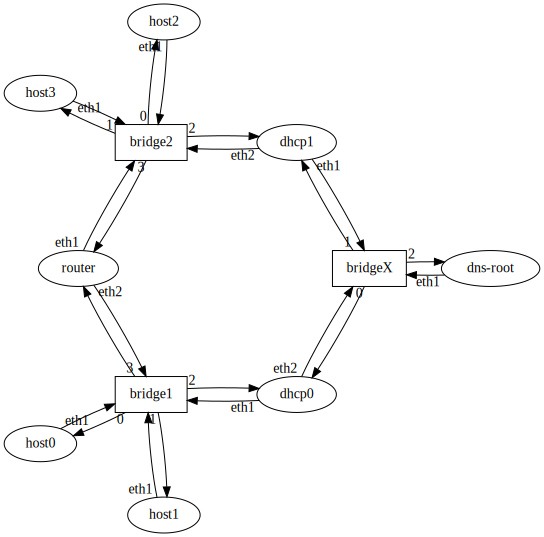

In [34]:
genish.showtopo(net)

In [35]:
import uhgeni.ssh
uhgeni.ssh.writeSliceConfig(SLICE, net)

In [37]:
SITE.addDNSResourceRecord(context,SLICE, "dns-root", "myHost","A", "12.0.0.12", 600)
SITE.addDNSResourceRecord(context,SLICE, "dns-root", "myHost","AAAA","2002:db8::9", 600)
SITE.addDNSResourceRecord(context,SLICE, "dns-root", "Alias","CNAME", "teachers.uhcn", 600)
SITE.addDNSResourceRecord(context,SLICE, "dns-root", "myHost","TXT", "any_text_I_like", 600)
SITE.addDNSResourceRecord(context,SLICE, "dns-root", "@","MX","10 mail4", 600)


{'dns-root': True}

In [38]:
SITE.getAllDNSResourceRecords(context, SLICE, "dns-root")

Type,Name,Value
SOA,@,dns-root hostmaster 21 10800 15 604800 10800
NS,@,dns-root
MX,@,10 mail4
CNAME,Alias,teachers.uhcn
A,dns-root,192.168.0.55
A,dhcp0.lan1,192.168.0.1
NS,lan1,dhcp0.lan1
NS,lan2,dhcp1.lan2
A,dhcp1.lan2,192.168.0.2
A,myHost,12.0.0.12


In [28]:
SITE.getLastDNSDHCPops(context, SLICE, ["dhcp1"], 40, "dns")

Log
"Nov 16 02:40:28 dnsmasq[23]: started, version 2.72 cachesize 150"
Nov 16 02:40:28 dnsmasq[23]: compile time options: IPv6 GNU-getopt no-DBus no-i18n no-IDN DHCP DHCPv6 no-Lua TFTP no-conntrack ipset auth no-DNSSEC loop-detect
Nov 16 02:40:28 dnsmasq[23]: using local addresses only for domain lan2.myname.cnuh
Nov 16 02:40:28 dnsmasq[23]: using nameserver 192.168.0.55#53
Nov 16 02:40:28 dnsmasq[23]: reading /etc/resolv.conf
Nov 16 02:40:28 dnsmasq[23]: using local addresses only for domain lan2.myname.cnuh
Nov 16 02:40:28 dnsmasq[23]: using nameserver 192.168.0.55#53
Nov 16 02:40:28 dnsmasq[23]: using nameserver 8.8.8.8#53
Nov 16 02:40:28 dnsmasq[23]: read /data/add_hosts - 8 addresses


In [39]:
SITE.deletesliver(context, SLICE)

In [40]:
%load_ext genish

The genish extension is already loaded. To reload it, use:
  %reload_ext genish


In [41]:
SLICE = "SyedAhmed"
context.project = "uh-4421-fall17"

In [42]:
SITE = VTSAM.Illinois

In [43]:
r = VTS.Request()
#switches
s1 = r.Datapath(VTS.OVSL2Image(), "bridge1")
s2 = r.Datapath(VTS.OVSL2Image(), "bridge2")
#router
r0 = r.Container(VTS.Image("uh.cn4421"), "router")
#hosts
c0 = r.Container(VTS.Image("uh.net-client"), "host0")
c1 = r.Container(VTS.Image("uh.net-client"), "host1")
c2 = r.Container(VTS.Image("uh.net-client"), "host2")
c3 = r.Container(VTS.Image("uh.net-client"), "host3")
#connections
VTS.connectInternalCircuit(s1, c0)
VTS.connectInternalCircuit(s1, c1)
VTS.connectInternalCircuit(s2, c2)
VTS.connectInternalCircuit(s2, c3)
#dhcp servers
dhcp0 = r.Container(VTS.Image("uh.dnsdhcp"), "dhcp0")
dhcp1 = r.Container(VTS.Image("uh.dnsdhcp"), "dhcp1")
#root dns server
dr = r.Container(VTS.Image("uh.dnsroot"), "dns-root")

#bridge for out of band DNS network
brd = r.Datapath(VTS.OVSL2Image(), "bridgeX")
#dhcp server connections
(p1,p2)=VTS.connectInternalCircuit(dhcp0, s1)
(p3,p4)=VTS.connectInternalCircuit(dhcp1, s2)

#out of band network connections
(p5,p6)=VTS.connectInternalCircuit(dhcp0, brd)
(p7,p8)=VTS.connectInternalCircuit(dhcp1, brd)
(p9,p10)=VTS.connectInternalCircuit(dr, brd)
p5.addIPv4Address("192.168.0.1/24") 
#dns port on dhcp0
p7.addIPv4Address("192.168.0.2/24") 
#dns port on dhcp1
p9.addIPv4Address("192.168.0.55/24") 
#root port on dns-root
# IP addresses for router interfaces
(p11, p12) = VTS.connectInternalCircuit(s1, r0)
(p13, p14) = VTS.connectInternalCircuit(s2, r0)
p12.addIPv4Address("10.10.1.254/24")
p14.addIPv4Address("10.10.2.254/24")
#dns root attributes
dr.image.setImageAttribute("top-domain-name","SyedAhmed.cnuh")
#dhcp0 attributes 
dhcp0.image.setImageAttribute("subnet", "10.10.1.0/24")
dhcp0.image.setImageAttribute("sub-domain-name", "lan1")
dhcp0.image.setImageAttribute("root-dns", dr.name)
dhcp0.image.setImageAttribute("interface-to-root", p5.client_id)
dhcp0.image.setImageAttribute("interface-for-dhcp", p1.client_id)
#dhcp1 attributes
dhcp1.image.setImageAttribute("subnet", "10.10.2.0/24")
dhcp1.image.setImageAttribute("sub-domain-name", "lan2")
dhcp1.image.setImageAttribute("root-dns", dr.name)
dhcp1.image.setImageAttribute("interface-to-root", p7.client_id)
dhcp1.image.setImageAttribute("interface-for-dhcp", p3.client_id)


In [44]:
net = SITE.createsliver(context, SLICE, r)

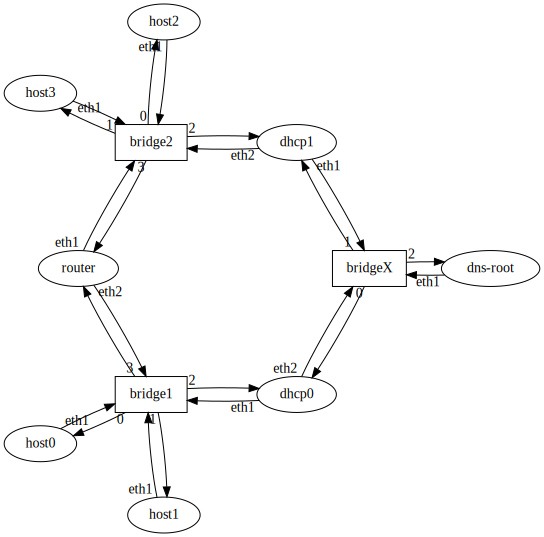

In [45]:
genish.showtopo(net)

In [46]:
import uhgeni.ssh
uhgeni.ssh.writeSliceConfig(SLICE, net)

In [47]:
SITE.addDNSResourceRecord(context,SLICE, "dns-root", "myHost","A", "12.0.0.12", 600)
SITE.addDNSResourceRecord(context,SLICE, "dns-root", "myHost","AAAA","2002:db8::9", 600)
SITE.addDNSResourceRecord(context,SLICE, "dns-root", "Alias","CNAME", "teachers.uhcn", 600)
SITE.addDNSResourceRecord(context,SLICE, "dns-root", "myHost","TXT", "any_text_I_like", 600)
SITE.addDNSResourceRecord(context,SLICE, "dns-root", "@","MX","10 mail4", 600)


{'dns-root': True}

In [48]:
SITE.getAllDNSResourceRecords(context, SLICE, "dns-root")

Type,Name,Value
SOA,@,dns-root hostmaster 6 10800 15 604800 10800
NS,@,dns-root
MX,@,10 mail4
CNAME,Alias,teachers.uhcn
A,dns-root,192.168.0.55
A,dhcp0.lan1,192.168.0.1
NS,lan1,dhcp0.lan1
NS,lan2,dhcp1.lan2
A,dhcp1.lan2,192.168.0.2
A,myHost,12.0.0.12


In [49]:
SITE.getLastDNSDHCPops(context, SLICE, ["dhcp1"], 40, "dns")

Log
"Nov 16 03:32:30 dnsmasq[24]: started, version 2.72 cachesize 150"
Nov 16 03:32:30 dnsmasq[24]: compile time options: IPv6 GNU-getopt no-DBus no-i18n no-IDN DHCP DHCPv6 no-Lua TFTP no-conntrack ipset auth no-DNSSEC loop-detect
Nov 16 03:32:30 dnsmasq[24]: using local addresses only for domain lan2.SyedAhmed.cnuh
Nov 16 03:32:30 dnsmasq[24]: using nameserver 192.168.0.55#53
Nov 16 03:32:30 dnsmasq[24]: reading /etc/resolv.conf
Nov 16 03:32:30 dnsmasq[24]: using local addresses only for domain lan2.SyedAhmed.cnuh
Nov 16 03:32:30 dnsmasq[24]: using nameserver 192.168.0.55#53
Nov 16 03:32:30 dnsmasq[24]: using nameserver 8.8.8.8#53
Nov 16 03:32:30 dnsmasq[24]: read /data/add_hosts - 8 addresses


#part1 


#Part 2

# Evaluation Question for PT 2: 

Q) Identify the DNS query packet, and the DNS response packet in your tcpdumps outputs

 dhcp0.lan1.SyedAhmed.cnuh.53: 0+ A? host1. (23)
 
 05:11:18.336384 fe:83:0a:a4:d8:78 (oui Unknown) > 26:60:07:f4:4d:57 (oui Unknown), ethertype IPv4 (0x0800), length 81: dhcp0.lan1.SyedAhmed.cnuh
.53 > host0.lan1.SyedAhmed.cnuh.53: 0* 1/0/0 A 10.10.1.197 (39)
05:11:18.336428 26:60:07:f4:4d:57 (oui Unknown) > fe:83:0a:a4:d8:78 (oui Unknown), ethertype IPv4 (0x0800), length 109: host0.lan1.SyedAhmed.cnu
h > dhcp0.lan1.SyedAhmed.cnuh: ICMP host0.lan1.SyedAhmed.cnuh udp port 53 unreachable, length 75

Answer) Query type is - A and Respond packet is - 0.10.1.197 (39)

 Answer Proof) dhcp0.lan1.SyedAhmed.cnuh.53: 0+ A? host1
 Answer Proof) host0.lan1.SyedAhmed.cnuh.53: 0* 1/0/0 A 10.10.1.197 (39)

# Whole code TCP dump if needed 


# Evaluation Question Procdure Part3)

Evaluation Question: Identify the DNS query packet, and the DNS response packet in your tcpdumps outputs

    
FQDN may communicate across subnets however hostname is not able to and therefore can not communicate with other subnets. NXDomain essentially means that the address doesn't exist and that there's an non existent domain to the host making the query. That's what was mentioned in the video. In the video Ade mentions that it can not communiate to host 3 because its in a whole another subnet. 